# Model Training and MLflow Tracking

This notebook trains all three models and tracks them using MLflow.

In [1]:
# Import necessary libraries
import sys
import os
sys.path.append('../src')

import mlflow
import pandas as pd
import numpy as np
from mlflow_config import setup_mlflow, compare_runs, get_best_model, register_model
from utils import compare_models

In [2]:
# Setup MLflow experiment
experiment_id = setup_mlflow(experiment_name="iris-classification")
print(f"MLflow experiment ID: {experiment_id}")

Created new experiment: iris-classification (ID: 768731044877803974)
MLflow experiment ID: 768731044877803974


Training Logistic Regression...
Logistic Regression model trained successfully!

Logistic Regression Results:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333
Model saved to ../models/logistic_regression_model.pkl


2025/09/18 21:48:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/18 21:48:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MLflow run ID: 197824d4fb484960ab00197e901da895


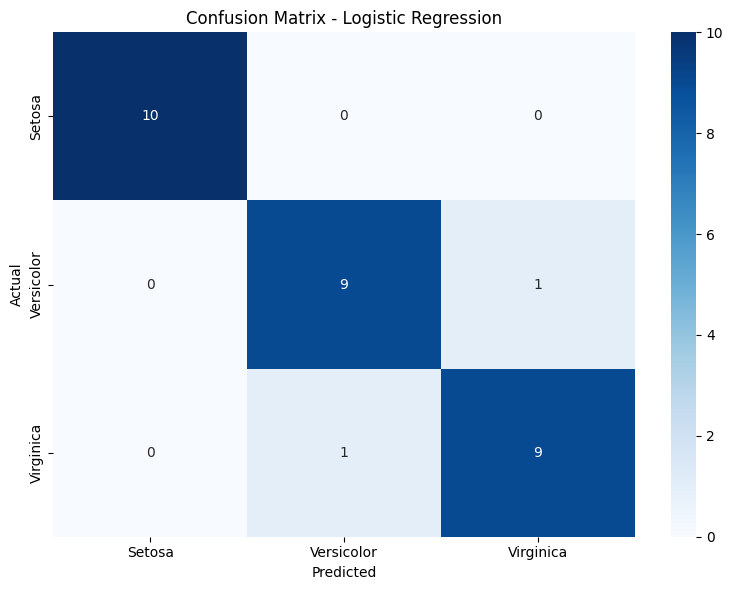

In [3]:
# Train Logistic Regression
print("Training Logistic Regression...")
from logistic_regression import main as train_lr
lr_model, lr_metrics = train_lr()


Training Random Forest...
Random Forest model trained successfully!

Random Forest Results:
Accuracy: 0.9000
Precision: 0.9024
Recall: 0.9000
F1-Score: 0.8997


2025/09/18 21:48:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


\nFeature Importance:
sepal length: 0.1163
sepal width: 0.0150
petal length: 0.4315
petal width: 0.4372
Model saved to ../models/random_forest_model.pkl


2025/09/18 21:48:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


\nMLflow run ID: fbd64ef494ad4e8b937a03b76be677e9


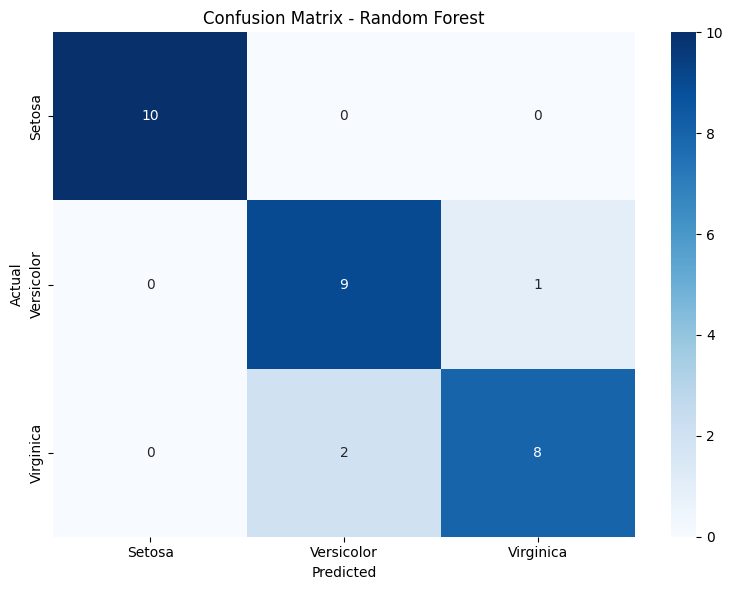

In [4]:
# Train Random Forest
print("\nTraining Random Forest...")
from random_forest import main as train_rf
rf_model, rf_metrics = train_rf()


Training SVM...
SVM model trained successfully!

Support Vector Machine Results:
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666


2025/09/18 21:49:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model saved to ../models/svm_model.pkl


2025/09/18 21:49:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


\nMLflow run ID: ed67ca2912844ef881a41fd994f9d8c8


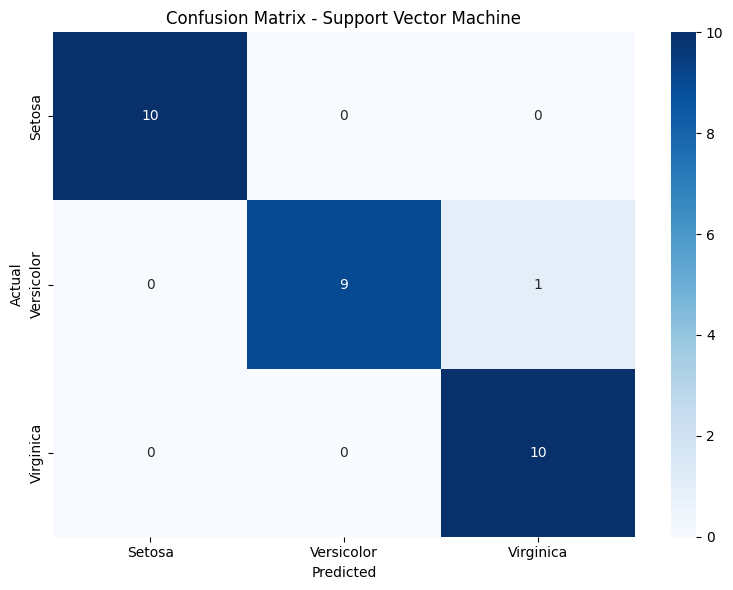

In [5]:
# Train SVM
print("\nTraining SVM...")
from svm import main as train_svm
svm_model, svm_metrics = train_svm()

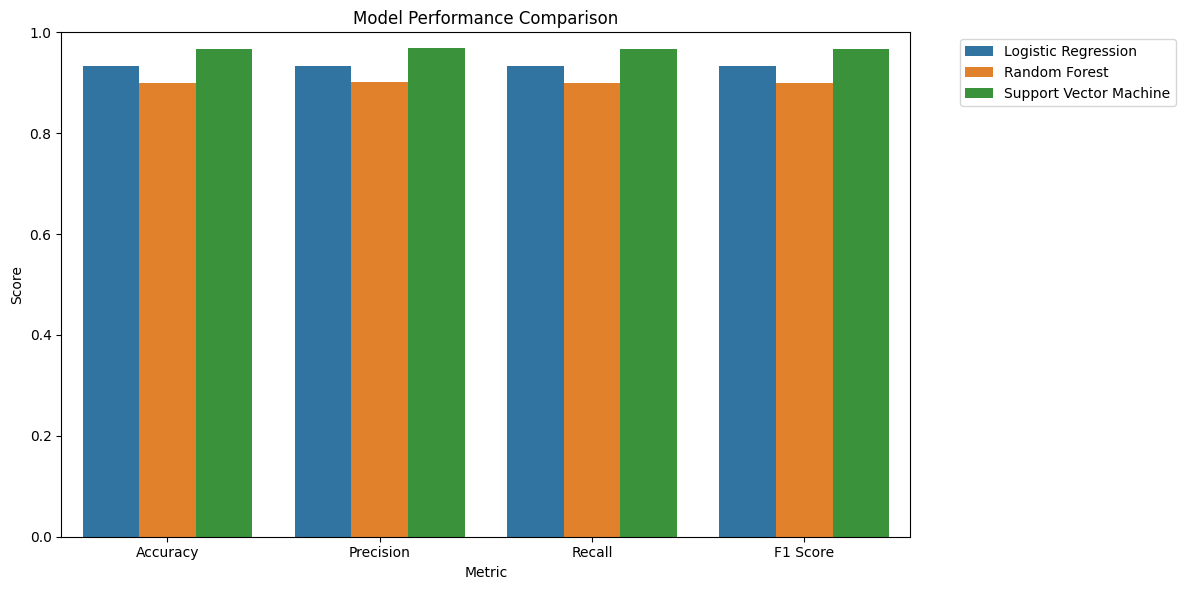


Model Comparison:
Metric                  Accuracy  F1 Score  Precision    Recall
Model                                                          
Logistic Regression     0.933333  0.933333   0.933333  0.933333
Random Forest           0.900000  0.899749   0.902357  0.900000
Support Vector Machine  0.966667  0.966583   0.969697  0.966667


In [6]:
# Compare all models
results_dict = {
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'Support Vector Machine': svm_metrics
}

# Create comparison plot
comparison_df = compare_models(results_dict)
print("\nModel Comparison:")
print(comparison_df.pivot(index='Model', columns='Metric', values='Value'))

In [7]:
# Compare runs in MLflow
runs = compare_runs(experiment_name="iris-classification")

\nExperiment: iris-classification
--------------------------------------------------------------------------------
Run ID                               Model                Accuracy   F1-Score  
--------------------------------------------------------------------------------
ed67ca29...                          Support Vector Machine 0.9667     0.9666    
fbd64ef4...                          Random Forest        0.9000     0.8997    
197824d4...                          Logistic Regression  0.9333     0.9333    


In [8]:
# Find the best model
best_run = get_best_model(experiment_name="iris-classification", metric="accuracy")

if best_run:
    print(f"\nBest model details:")
    print(f"Run Name: {best_run.data.tags.get('mlflow.runName', 'Unknown')}")
    print(f"Accuracy: {best_run.data.metrics.get('accuracy', 0):.4f}")
    print(f"F1-Score: {best_run.data.metrics.get('f1_score', 0):.4f}")
    print(f"Precision: {best_run.data.metrics.get('precision', 0):.4f}")
    print(f"Recall: {best_run.data.metrics.get('recall', 0):.4f}")

Best model run ID: ed67ca2912844ef881a41fd994f9d8c8
Best accuracy: 0.9667

Best model details:
Run Name: Support Vector Machine
Accuracy: 0.9667
F1-Score: 0.9666
Precision: 0.9697
Recall: 0.9667


In [9]:
# Register the best model
if best_run:
    model_name = "iris-classifier-best"
    model_path = best_run.data.tags.get('mlflow.runName', 'model').lower().replace(' ', '_')
    
    description = f"Best performing iris classifier with accuracy: {best_run.data.metrics.get('accuracy', 0):.4f}"
    
    model_version = register_model(
        model_name=model_name,
        run_id=best_run.info.run_id,
        model_path=model_path,
        description=description
    )
    
    if model_version:
        print(f"\nModel registered successfully!")
        print(f"Model name: {model_name}")
        print(f"Version: {model_version.version}")
        print(f"Stage: {model_version.current_stage}")

Successfully registered model 'iris-classifier-best'.
2025/09/18 21:49:55 WARNING mlflow.tracking._model_registry.fluent: Run with id ed67ca2912844ef881a41fd994f9d8c8 has no artifacts at artifact path 'support_vector_machine', registering model based on models:/m-63ea0bb8d0504d0bb34f9684151af3eb instead


Model iris-classifier-best registered successfully!
Model version: 1
Error registering model: ('cannot represent an object', <Metric: dataset_digest=None, dataset_name=None, key='accuracy', model_id='m-63ea0bb8d0504d0bb34f9684151af3eb', run_id='ed67ca2912844ef881a41fd994f9d8c8', step=0, timestamp=1758214149996, value=0.9666666666666667>)


Created version '1' of model 'iris-classifier-best'.
